In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

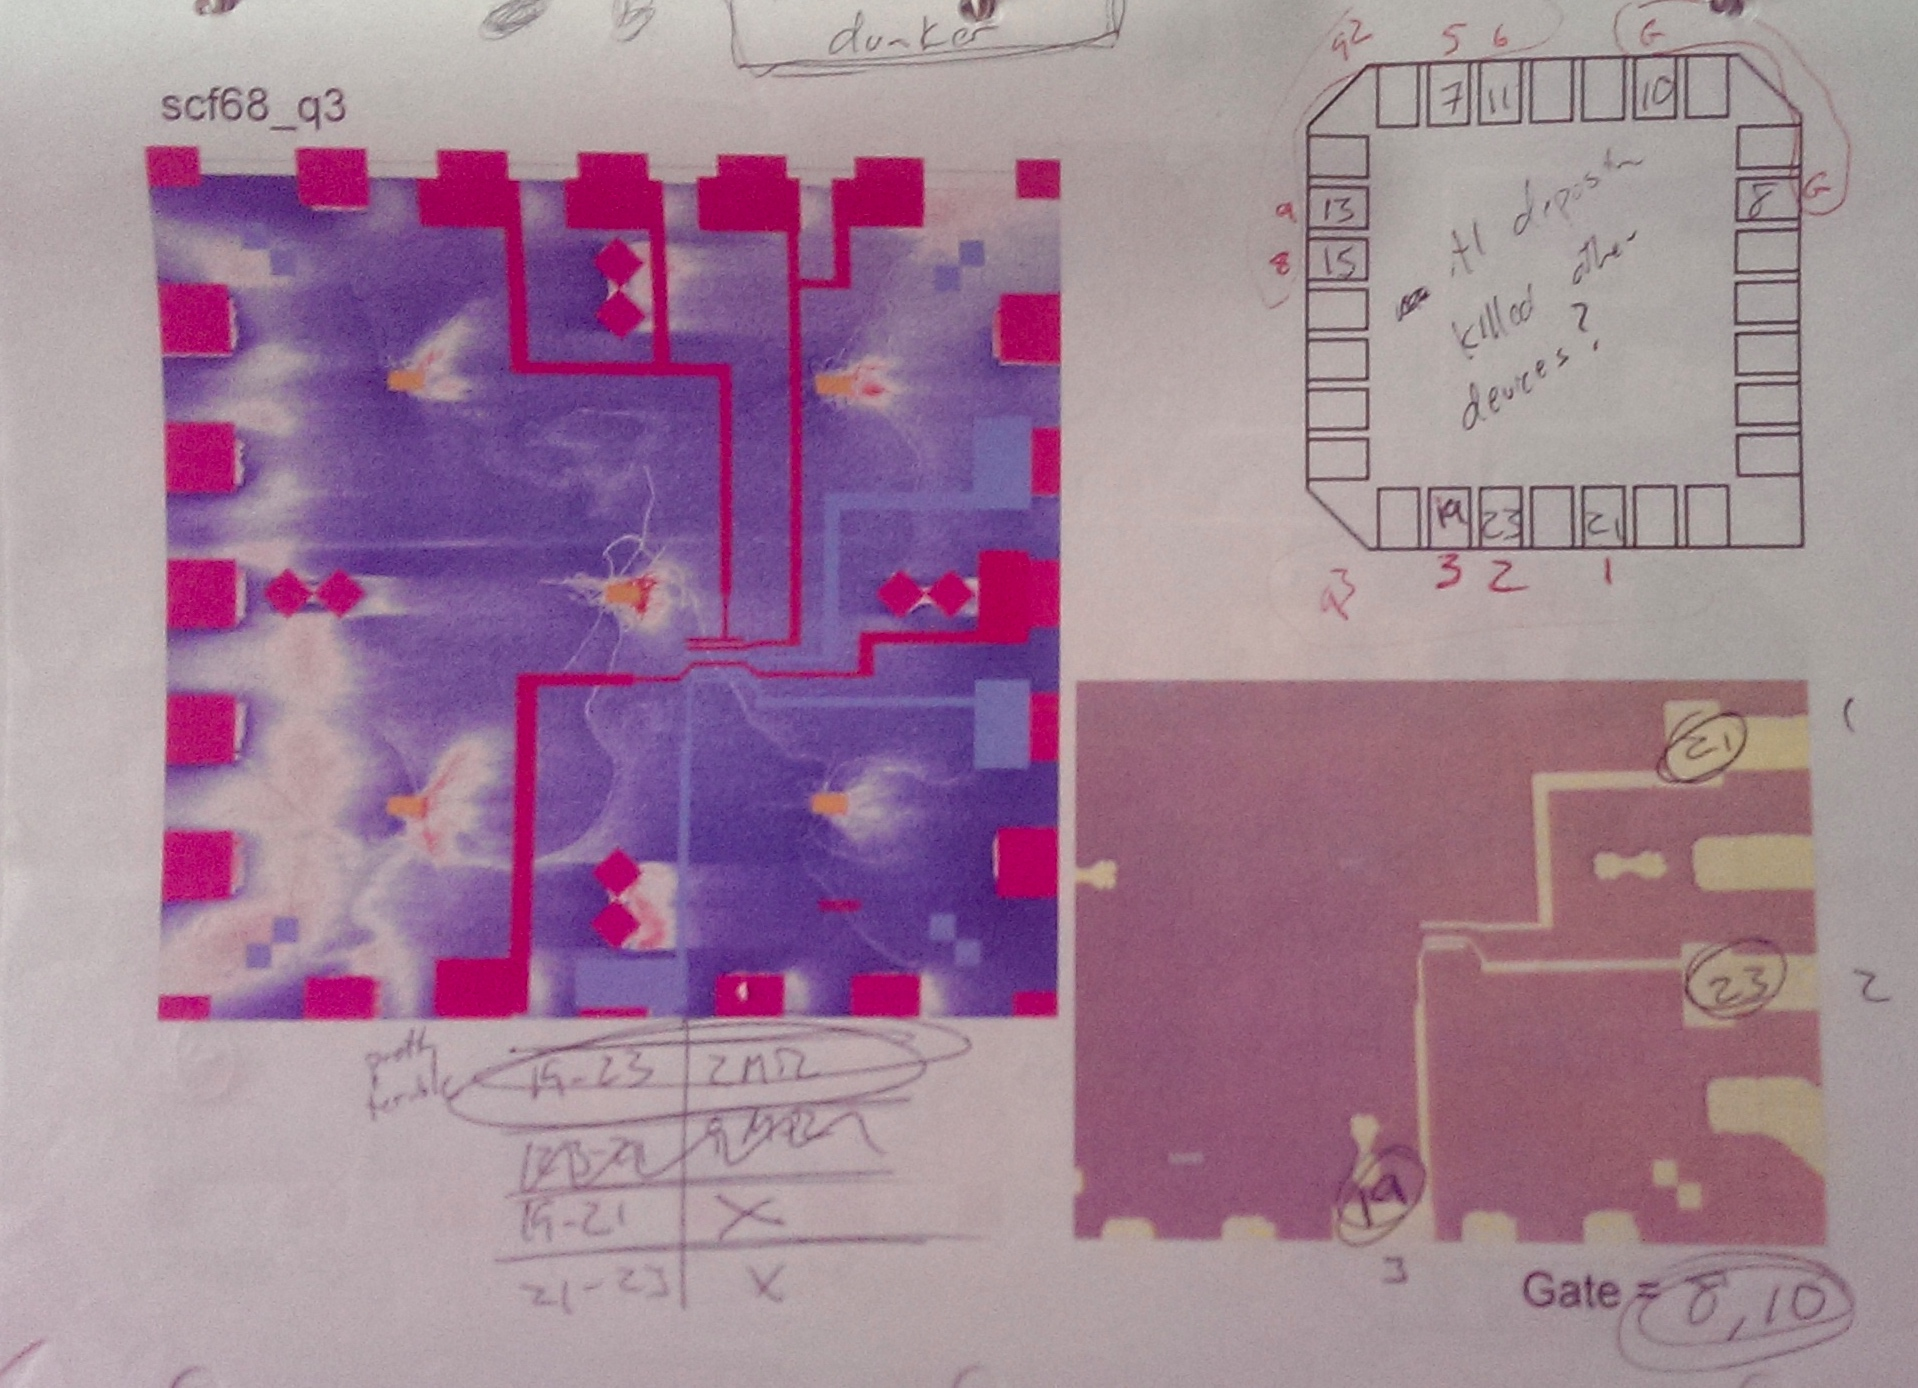

In [6]:
from IPython.display import Image, display

fig_dir = '/Volumes/EDDropbox/Data/SCF68/figures/'
display(Image(filename=os.path.join(fig_dir,'scf68.jpg')))

In [11]:
def quick_plot_any(filename):
    """ for use in a for-loop when trolling through a whole folder of data.
        trying to catch exceptions as they arise. """
    dimension = lvdt.is_2d(filename)
    if dimension==2:
        try:
            df = lvdt.get_data_2d(filename)
            fig, ax = lvdt.plot_simple_2d(df)
        except(AttributeError, ValueError, IndexError): 
            return 'Fail -- 2d. A real problem.'
    elif dimension==3:
        try:
            df = lvdt.get_data_3d(filename)
            fig, ax, cb = lvdt.plot_simple_3d(df)
        except(AttributeError, ValueError, IndexError): 
            return 'Fail -- 3d. A real problem.'
    else:
        return 'Ignored. No .txt file to match.'
    ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
    return 'Pass -- {0}d. Good job, buddy.'.format(dimension)

### Room Temp

In [12]:
data_dir = '/Volumes/EDDropbox/Data/SCF68/room_temp/'
for f in glob.glob(os.path.join(data_dir, '*.bin')):
    print f.split('/')[-1]

q3_3-1_VI_a.bin
q3_1-2_gateswp_postwb_a.bin
q3_1-2_VI_postwb_a.bin
q3_3-2_VI_a.bin
q3_1-2_gateswp_postwb_b.bin
q3_1-2_VI_postwb_b.bin
q3_3-2_VI_b.bin
q3_1-2_VI_postwb_c.bin
q3_1-2_gateswp_a.bin
q3_1-2_VI_a.bin


q3_1-2_gateswp_postwb_a.bin Pass -- 2d. Good job, buddy.
q3_1-2_gateswp_postwb_b.bin Pass -- 2d. Good job, buddy.
q3_1-2_gateswp_a.bin Pass -- 2d. Good job, buddy.


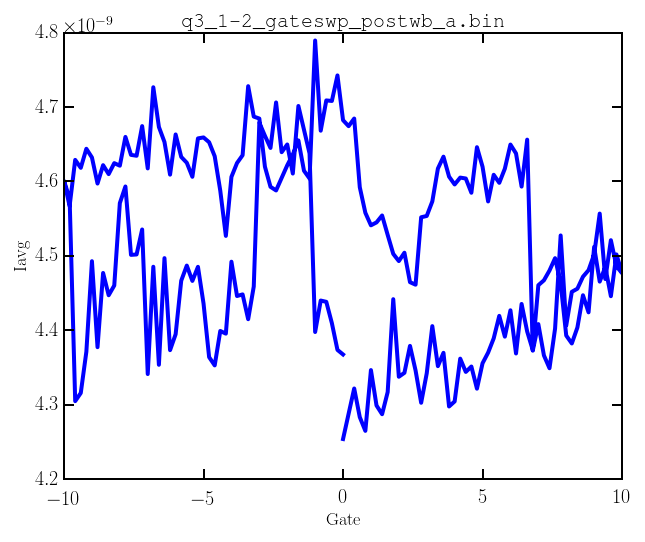

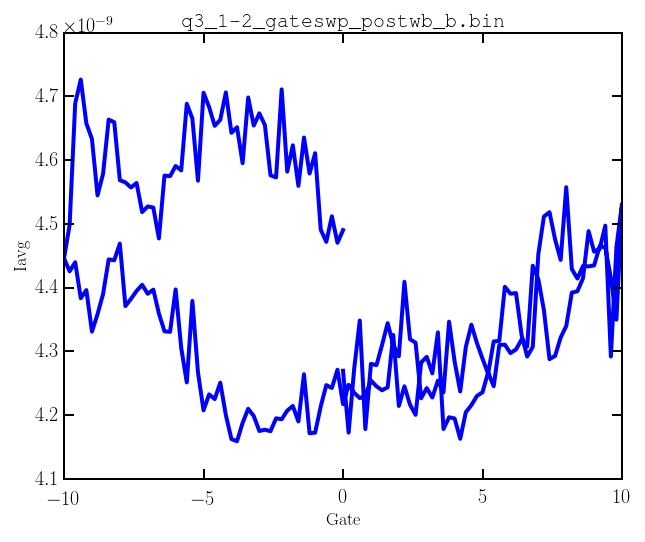

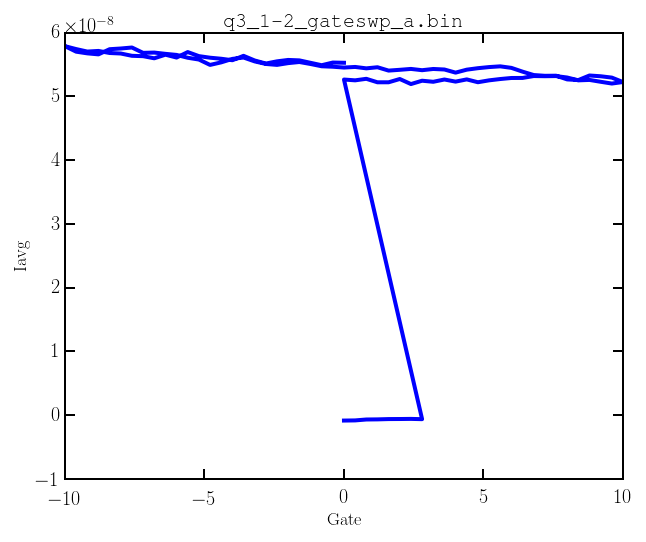

In [15]:
for f in glob.glob(os.path.join(data_dir, '*_gateswp_*.bin')):
    print f.split('/')[-1], quick_plot_any(f)

### Cool Down

In [16]:
data_dir = '/Volumes/EDDropbox/Data/SCF68/cool_down/'
for f in glob.glob(os.path.join(data_dir, '*.bin')):
    print f.split('/')[-1]

q3_1-2_test_2.bin
q3_1-2_gateswp_7K_b.bin
q3_1-2_test.bin


q3_1-2_test_2.bin Pass -- 2d. Good job, buddy.
q3_1-2_gateswp_7K_b.bin Pass -- 2d. Good job, buddy.
q3_1-2_test.bin Pass -- 2d. Good job, buddy.


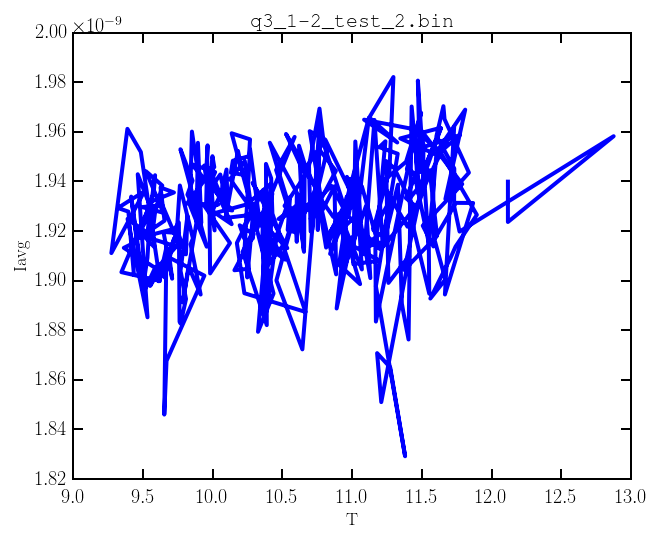

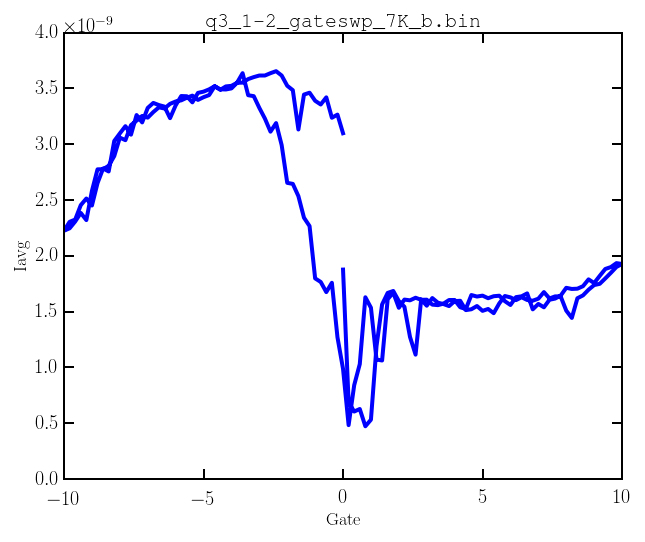

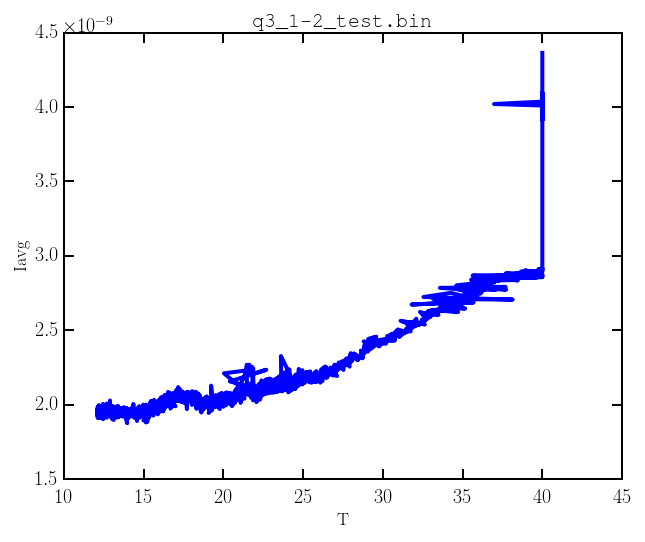

In [18]:
for f in glob.glob(os.path.join(data_dir, '*.bin')):
    print f.split('/')[-1], quick_plot_any(f)

### 4K Gate Sweep Data

In [19]:
data_dir = '/Volumes/EDDropbox/Data/SCF68/4K_gate/'
for f in glob.glob(os.path.join(data_dir, '*.bin')):
    print f.split('/')[-1]

q3_1-2_gateswp_4K_c.bin
q3_1-2_gateswp_4K_d.bin
q3_1-2_gateswp_4K_e.bin


q3_1-2_gateswp_4K_c.bin Pass -- 2d. Good job, buddy.
q3_1-2_gateswp_4K_d.bin Pass -- 2d. Good job, buddy.
q3_1-2_gateswp_4K_e.bin Pass -- 2d. Good job, buddy.


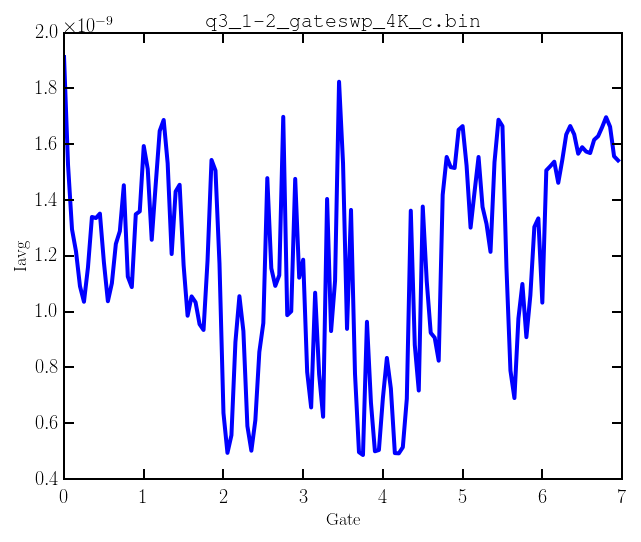

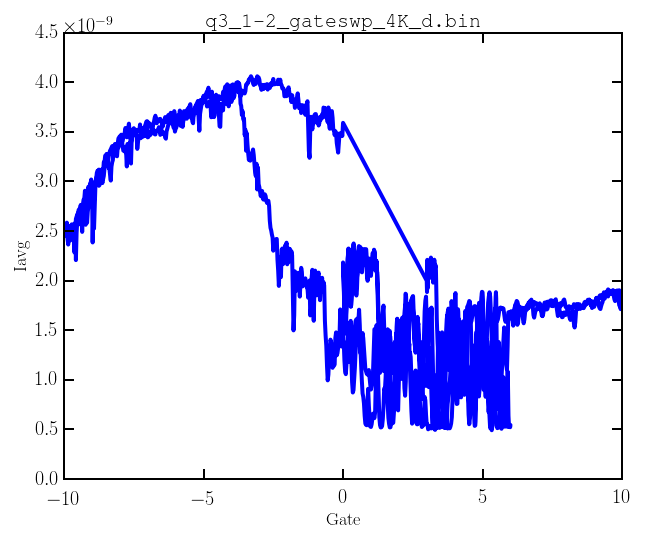

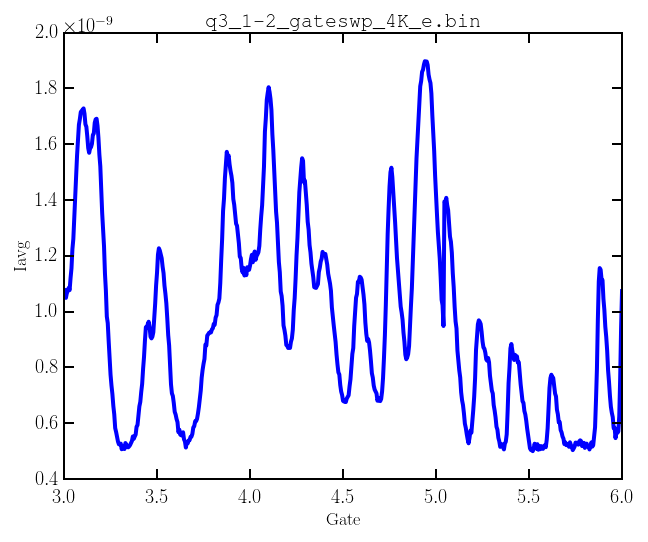

In [20]:
for f in glob.glob(os.path.join(data_dir, '*.bin')):
    print f.split('/')[-1], quick_plot_any(f)

### 4K VI

In [22]:
data_dir = '/Volumes/EDDropbox/Data/SCF68/VI_check_4K/'
for f in glob.glob(os.path.join(data_dir, '*.bin')):
    print f.split('/')[-1]

q3_1-2_VI-check.bin


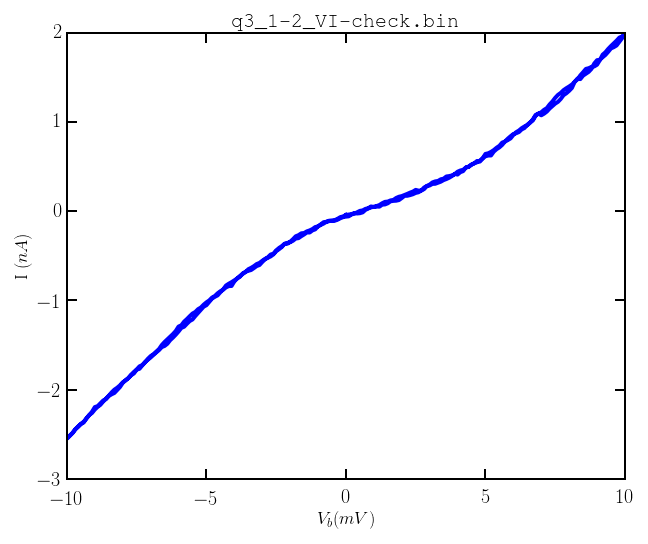

In [39]:
f = os.path.join(data_dir, 'q3_1-2_VI-check.bin')
data = np.fromfile(f,'>d')
data = data.reshape((-1,data[0]))
bias = data[0][1:]*1e3
current = data[1][1:]*1e9

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(bias, current)
ax.set_xlabel('$V_b (mV)$')
ax.set_ylabel('I $(nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

I took some VI vs Gate data, but the setup was wrong and the gate didn't work. The sample warmed up before I could fix the problem.